In [2]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

data = pd.read_excel('Equipmentseparateddata.xlsx', engine='openpyxl')
# pd.reset_option("display.max_colwidth")
# Remove the first column
data = data.drop(data.columns[0], axis=1)

# Display the first two rows to verify
data.head(2)

,Vendor,Equipment,CVE_IDs,CVSS,attackVector,attackComplexity,privilegesRequired,userInteraction,scope,confidentialityImpact,integrityImpact,availabilityImpact,CWE,cpe
0,Philips,Vue PACS,CVE-2020-35728,Critical,NETWORK,HIGH,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,CWE-502,cpe:2.3:a:fasterxml:jackson-databind:*:*:*:*:*...
1,Philips,Vue PACS,CVE-2020-11113,Critical,NETWORK,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,HIGH,CWE-502,cpe:2.3:a:fasterxml:jackson-databind:*:*:*:*:*...


In [3]:
# # Identify rows where the same equipment has the same CWE multiple times
# duplicate_cwe_rows = data.duplicated(subset=['Equipment', 'CWE'], keep=False)

# # Drop these rows from the dataset
# cleaned_data = data[~duplicate_cwe_rows]

# Display the number of rows before and after
print(f"Number of rows before cleaning: {data.shape[0]}")
# print(f"Number of rows after cleaning: {cleaned_data.shape[0]}")

Number of rows before cleaning: 615


In [4]:


# Calculate the total number of unique CVE_IDs across the entire dataset
unique_cve_count = data['CVE_IDs'].nunique()

# Calculate the total number of unique CWE entries across the entire dataset
unique_cwe_count = data['CWE'].nunique()

# Calculate the total number of unique Equipment types
unique_equipment_count = data['Equipment'].nunique()

# Calculate the total number of unique Equipment-CVE combinations
unique_equipment_cve_count = data[['Equipment', 'CVE_IDs']].drop_duplicates().shape[0]

# Calculate the total number of unique Equipment-CWE combinations
unique_equipment_cwe_count = data[['Equipment', 'CWE']].drop_duplicates().shape[0]

# Print the results
print(f"Total number of unique CVE_IDs: {unique_cve_count}")
print(f"Total number of unique CWE entries: {unique_cwe_count}")
print(f"Total number of unique Equipment entries: {unique_equipment_count}")
print(f"Total number of unique Equipment-CVE combinations: {unique_equipment_cve_count}")
print(f"Total number of unique Equipment-CWE combinations: {unique_equipment_cwe_count}")



Total number of unique CVE_IDs: 297
Total number of unique CWE entries: 84
Total number of unique Equipment entries: 171
Total number of unique Equipment-CVE combinations: 615
Total number of unique Equipment-CWE combinations: 493


In [5]:
# Counting the most common CWE across the dataset
cwe_distribution = data['CWE'].value_counts().head(10)
cwe_distribution



CWE-287    59
CWE-798    46
CWE-330    41
CWE-20     34
CWE-522    31
CWE-120    29
CWE-79     27
CWE-319    26
CWE-306    21
CWE-326    15
Name: CWE, dtype: int64

In [6]:
# Display the data types of each column
# print(data.dtypes
# Summary statistics for numeric columns
data.describe(include='all')

,Vendor,Equipment,CVE_IDs,CVSS,attackVector,attackComplexity,privilegesRequired,userInteraction,scope,confidentialityImpact,integrityImpact,availabilityImpact,CWE,cpe
count,615,615,615,615,615,615,615,615,615,615,615,615,615,615
unique,40,171,297,4,4,2,3,2,2,3,3,3,84,142
top,Philips,Vue PACS,CVE-2020-6963,Medium,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,CWE-287,cpe:2.3:a:philips:patient_information_center_i...
freq,158,19,7,217,281,547,464,553,523,395,342,326,59,51


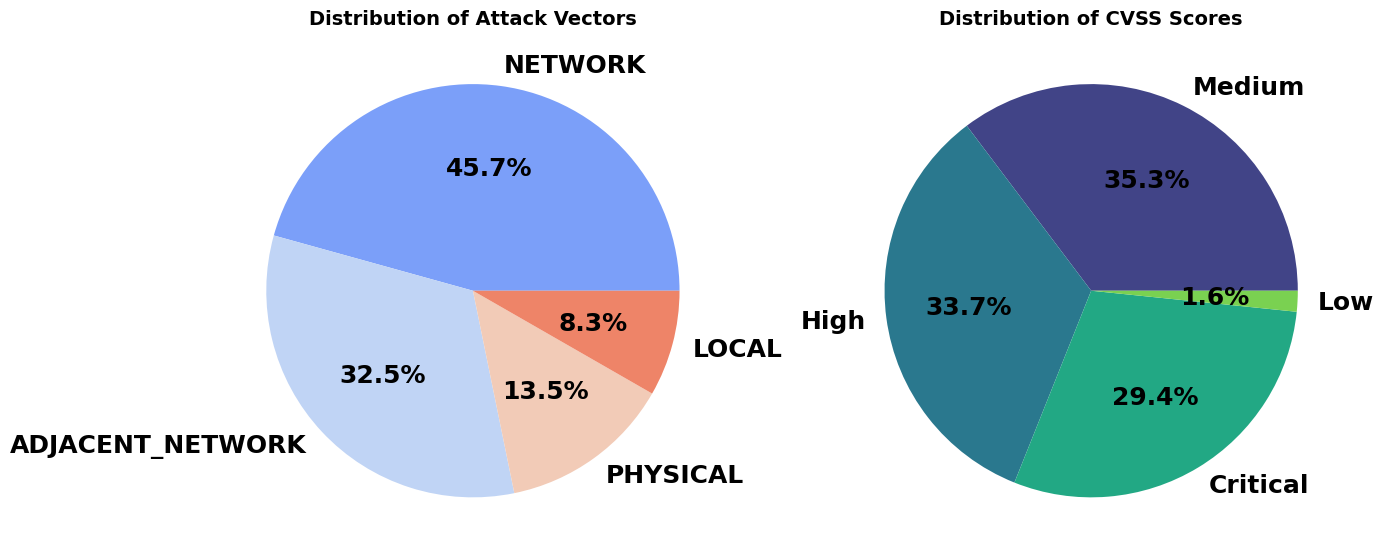

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is the dataframe containing the 'CVSS' and 'attackVector' columns

# Prepare data
cvss_counts = data['CVSS'].value_counts()  # Count occurrences of each CVSS score
attack_counts = data['attackVector'].value_counts()  # Count occurrences of each attack vector

# Create figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # 1 row, 2 columns, larger size for better clarity

# Plot 1: Pie chart for CVSS scores
axes[1].pie(cvss_counts, labels=cvss_counts.index, autopct='%1.1f%%', 
            colors=sns.color_palette('viridis', len(cvss_counts)),
            textprops={'fontsize': 18, 'fontweight': 'bold'})  # Adjusting text size and boldness
axes[1].set_title('Distribution of CVSS Scores', fontweight='bold', fontsize=14)

# Plot 2: Pie chart for attack vectors
axes[0].pie(attack_counts, labels=attack_counts.index, autopct='%1.1f%%', 
            colors=sns.color_palette('coolwarm', len(attack_counts)),
            textprops={'fontsize': 18, 'fontweight': 'bold'})  # Adjusting text size and boldness
axes[0].set_title('Distribution of Attack Vectors', fontweight='bold', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [7]:
# Count frequency of each CWE
cwe_counts = data['CWE'].value_counts().reset_index()
cwe_counts.columns = ['CWE', 'Count']

# Get the top CWEs
top_cwe_counts = cwe_counts.head(10)

# Display the top CWEs and their counts
print(top_cwe_counts)

       CWE  Count
0  CWE-287     59
1  CWE-798     46
2  CWE-330     41
3   CWE-20     34
4  CWE-522     31
5  CWE-120     29
6   CWE-79     27
7  CWE-319     26
8  CWE-306     21
9  CWE-326     15


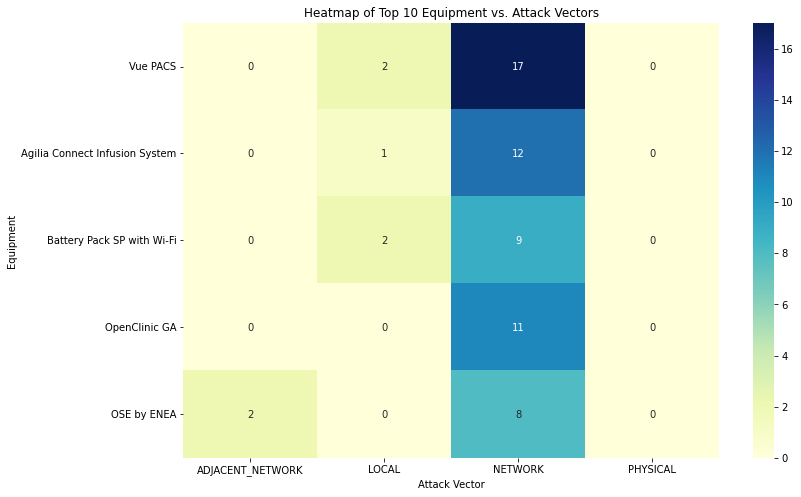

In [7]:
# Counting the number of occurrences for each Equipment-AttackVector pair
equipment_attack_vector_heatmap = pd.crosstab(data['Equipment'], data['attackVector'])

# Keeping only the top 10 Equipment
top_10_equipment = equipment_attack_vector_heatmap.sum(axis=1).sort_values(ascending=False).head(5).index

# Filtering the heatmap data
equipment_attack_vector_heatmap = equipment_attack_vector_heatmap.loc[top_10_equipment]

plt.figure(figsize=(12, 8))
sns.heatmap(equipment_attack_vector_heatmap, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Top 10 Equipment vs. Attack Vectors')
plt.xlabel('Attack Vector')
plt.ylabel('Equipment')
plt.show()


In [37]:
import pandas as pd

# Data for the table (based on your description)
data = {
    'Equipment': [
        'Agilia Connect Infusion System', 
        'Battery Pack SP with Wi-Fi', 
        'OpenClinic GA', 
        'SpaceCom', 
        'Vue PACS'
    ],
    'Vendor': [
        'B. Braun Melsungen AG', 
        'Fresenius Kabi', 
        'Source Forge', 
        'Philips', 
        'Philips'
    ],
    'Usage': [
        'Medical infusion system for delivering medication.',
        'Portable medical device battery with Wi-Fi capability.',
        'Open-source hospital management software.',
        'Satellite communication equipment for medical data.',
        'System for managing medical imaging data.'
    ],
    'Vulnerability Count': [13, 11, 11, 10, 19]
}

# Create a DataFrame
df_table = pd.DataFrame(data)

# Display the DataFrame
print(df_table)

# Save the table as an HTML file
df_table.to_html('vulnerable_equipment_table.html', index=False)


                        Equipment                 Vendor  \
0  Agilia Connect Infusion System  B. Braun Melsungen AG   
1      Battery Pack SP with Wi-Fi         Fresenius Kabi   
2                   OpenClinic GA           Source Forge   
3                        SpaceCom                Philips   
4                        Vue PACS                Philips   

                                               Usage  Vulnerability Count  
0  Medical infusion system for delivering medicat...                   13  
1  Portable medical device battery with Wi-Fi cap...                   11  
2          Open-source hospital management software.                   11  
3  Satellite communication equipment for medical ...                   10  
4          System for managing medical imaging data.                   19  


In [8]:
data

,Vendor,Equipment,CVE_IDs,CVSS,attackVector,attackComplexity,privilegesRequired,userInteraction,scope,confidentialityImpact,integrityImpact,availabilityImpact,CWE,cpe
0,Philips,Vue PACS,CVE-2020-35728,Critical,NETWORK,HIGH,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,CWE-502,cpe:2.3:a:fasterxml:jackson-databind:*:*:*:*:*...
1,Philips,Vue PACS,CVE-2020-11113,Critical,NETWORK,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,HIGH,CWE-502,cpe:2.3:a:fasterxml:jackson-databind:*:*:*:*:*...
2,Philips,Vue PACS,CVE-2020-14061,Critical,NETWORK,HIGH,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,CWE-502,cpe:2.3:a:fasterxml:jackson-databind:*:*:*:*:*...
3,Philips,Vue PACS,CVE-2017-17485,Critical,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,CWE-502,cpe:2.3:a:fasterxml:jackson-databind:*:*:*:*:*...
4,Philips,Vue PACS,CVE-2019-12814,Critical,NETWORK,HIGH,NONE,NONE,UNCHANGED,HIGH,NONE,NONE,CWE-502,cpe:2.3:a:fasterxml:jackson-databind:*:*:*:*:*...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Abbott Laboratories,Implantable Cardioverter Defibrillator,CVE-2017-12714,High,ADJACENT_NETWORK,LOW,NONE,NONE,UNCHANGED,NONE,NONE,HIGH,CWE-920,cpe:2.3:o:abbott:accent_firmware:*:*:*:*:*:*:*:*
611,Abbott Laboratories,Cardiac Synchronization Therapy Defibrillator,CVE-2017-12712,High,ADJACENT_NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,CWE-287,cpe:2.3:o:abbott:accent_firmware:*:*:*:*:*:*:*:*
612,Abbott Laboratories,Cardiac Synchronization Therapy Defibrillator,CVE-2017-12714,High,ADJACENT_NETWORK,LOW,NONE,NONE,UNCHANGED,NONE,NONE,HIGH,CWE-920,cpe:2.3:o:abbott:accent_firmware:*:*:*:*:*:*:*:*
613,Philips,Philips Alice 6 System product,CVE-2018-7498,Medium,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,CWE-311,cpe:2.3:o:philips:alice_6_firmware:*:*:*:*:*:*...


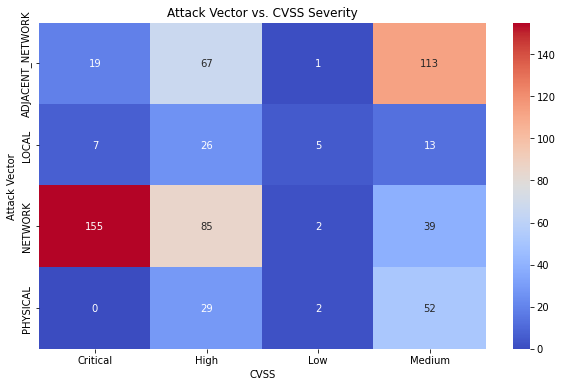

In [9]:
# Creating a cross-tabulation of attack vectors and CVSS
attack_vector_cvss = pd.crosstab(data['attackVector'], data['CVSS'])

# Plotting the cross-tabulation as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(attack_vector_cvss, annot=True, cmap='coolwarm', fmt='d')
plt.title('Attack Vector vs. CVSS Severity')
plt.xlabel('CVSS')
plt.ylabel('Attack Vector')
plt.show()


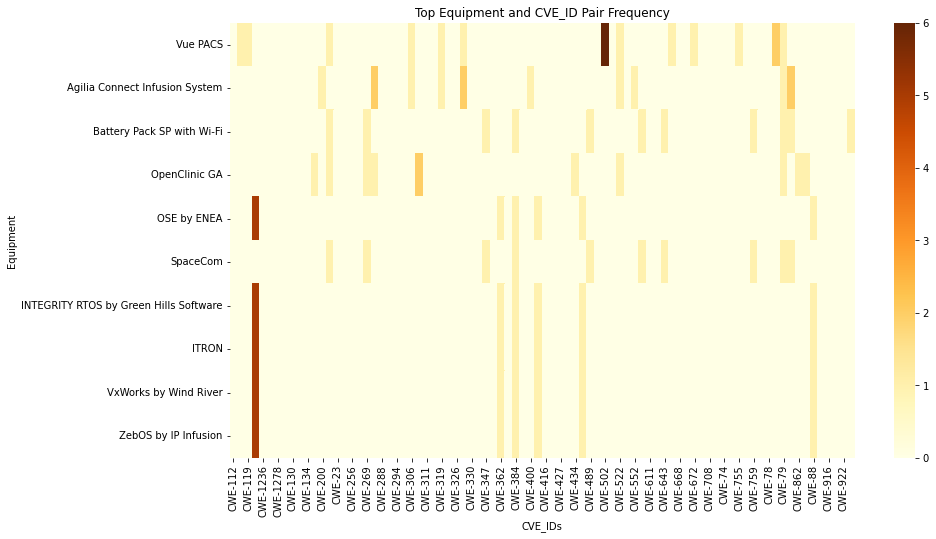

In [10]:
# Creating a cross-tabulation of Equipment and CVE_IDs
equipment_cve_pair = pd.crosstab(data['Equipment'], data['CWE'])

# Filtering top 10 equipment with the most frequent CVE_IDs
top_10_equipment = equipment_cve_pair.sum(axis=1).sort_values(ascending=False).head(10).index
top_equipment_cve_pair = equipment_cve_pair.loc[top_10_equipment]

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(top_equipment_cve_pair, cmap='YlOrBr', annot=False)
plt.title('Top Equipment and CVE_ID Pair Frequency')
plt.xlabel('CVE_IDs')
plt.ylabel('Equipment')
plt.show()


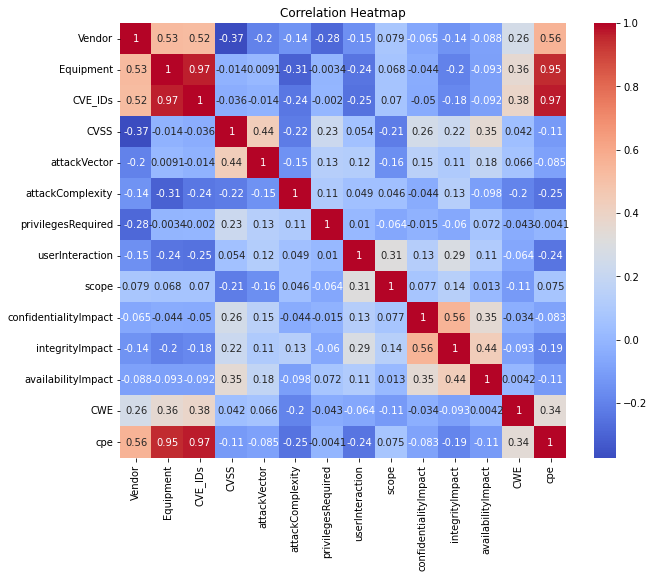

In [11]:
# Converting categorical columns to numerical for correlation
data_encoded = data.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(data, title='EDA Report')

# Save the report as an HTML file
profile.to_file('EDA_Report.html')


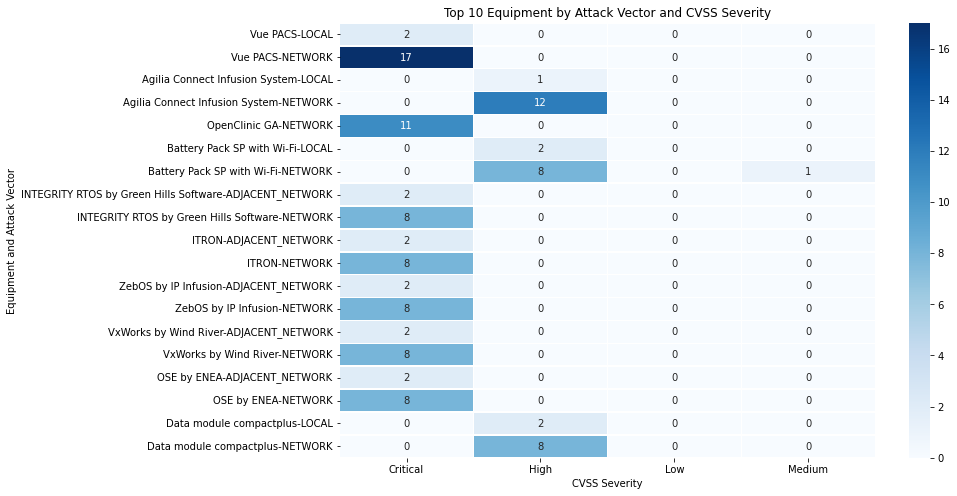

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the DataFrame is already loaded and named `df`

# Step 1: Create a pivot table for equipment, attack vectors, and CVSS severity
pivot_table = pd.pivot_table(data, 
                             values='CVE_IDs', 
                             index=['Equipment', 'attackVector'], 
                             columns='CVSS', 
                             aggfunc='count', 
                             fill_value=0)

# Step 2: Filter to focus on the top 10 most frequently mentioned equipment
top_equipment = data['Equipment'].value_counts().head(10).index
filtered_pivot_table = pivot_table.loc[top_equipment]

# Step 3: Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_pivot_table, annot=True, fmt="d", cmap="Blues", linewidths=.5)

# Adding titles and labels
plt.title('Top 10 Equipment by Attack Vector and CVSS Severity')
plt.xlabel('CVSS Severity')
plt.ylabel('Equipment and Attack Vector')

# Save the figure if needed
plt.savefig('equipment_specific_analysis.png', dpi=300, bbox_inches='tight')

plt.show()
